# 1. Feature Engineering-- End of Distribution Imputation Day 4

## Type 4: End of Distribution
Aim: It takes random observation and replaces the NaN value

When to use ? It is assumed that Data are Missing Completely at Random

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/Feature_Engineering/Dataset/titanic_train.csv", usecols = ['Age', 'Fare', "Survived"])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.Age.isnull().sum()

177

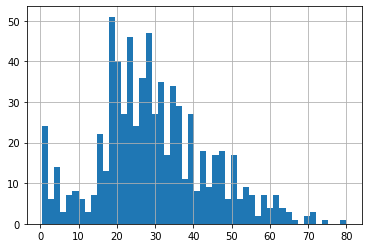

In [5]:
df.Age.hist(bins=50)

In [6]:
extreme = df.Age.mean() + 3*df.Age.std()

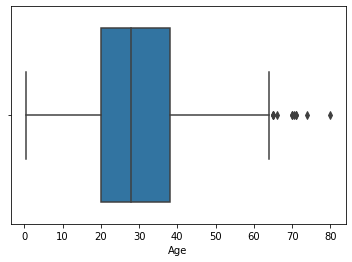

In [7]:
sns.boxplot('Age', data=df)

In [8]:
def impute_nan(data, feature, median, extreme):
    df[feature+'_median'] = df[feature].fillna(median)
    df[feature+'_end_distr'] = df[feature].fillna(extreme)
    df[feature].fillna(median, inplace=True)
    

In [9]:
median=df['Age'].median()

In [10]:
impute_nan(df, 'Age', median, extreme)

In [11]:
df.head()

,Survived,Age,Fare,Age_median,Age_end_distr
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


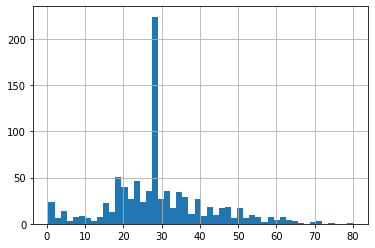

In [12]:
df.Age.hist(bins=50)

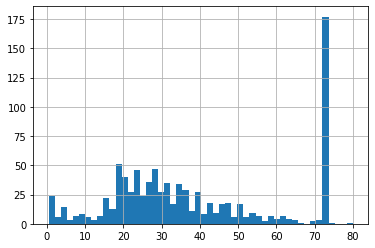

In [13]:
df.Age_end_distr.hist(bins=50)

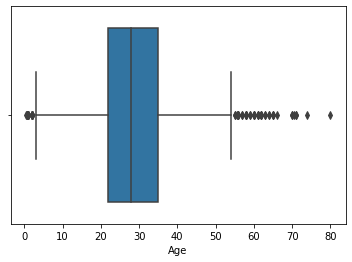

In [14]:
sns.boxplot('Age', data=df)

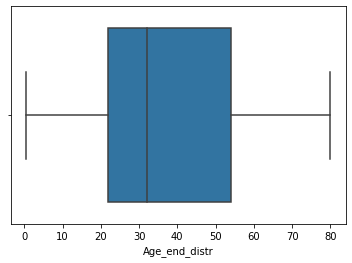

In [15]:
sns.boxplot('Age_end_distr', data=df)

<IPython.core.display.Javascript object>

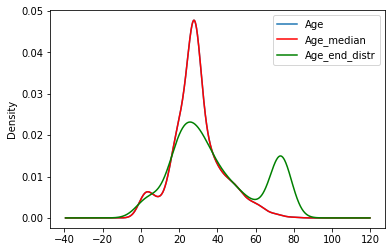

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
df['Age_end_distr'].plot(kind = 'kde', ax = ax, color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

### Advantage
- Easy to implement
- Captures the importance of the missing values

### Disavantage
- Create Additional feature (Curse of Dimensionality)